In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visual style
sns.set(style="whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv('A_synthetic_diabetic_data.csv')

In [4]:
# Replace '?' with NaN for proper analysis
df.replace('?', np.nan, inplace=True)

In [5]:
# Basic Information
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (101766, 50)


,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,199913117,187993076,7,19,14,2,4,6,43,41,...,No,No,No,No,No,No,No,No,No,NO
1,325203014,28777612,8,28,3,1,7,4,66,31,...,Up,Steady,No,No,No,No,Up,No,No,>30
2,250988024,105728084,1,27,14,12,25,0,6,0,...,Up,Steady,No,No,No,Steady,Steady,Ch,Yes,NO
3,127534385,99112732,4,7,20,1,9,3,49,18,...,No,No,No,No,No,No,Up,Ch,Yes,>30
4,423747494,50617238,2,8,8,4,111,3,54,8,...,No,Up,No,Up,No,Down,Steady,No,Yes,NO


In [6]:
PE=df['medical_specialty'].head()

In [7]:
PE.unique()

array(['InternalMedicine', nan, 'Cardiology'], dtype=object)

Univariate Analysis

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

A1Cresult,max_glu_serum-- relplace missing values  with zeros
WEIGHT FEEL WITH MEAN

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# List of ID columns to drop
id_columns = [
    'encounter_id', 
    'patient_nbr', 
    'admission_type_id', 
    'discharge_disposition_id', 
    'admission_source_id',
    'weight',
    'max_glu_serum',
    'A1Cresult',
    'medical_specialty',
    'payer_code'
]

# Dropping the columns from the dataframe
df = df.drop(columns=id_columns)

# Verify the changes
print(f"Remaining columns: {df.shape[1]}")
print(df.columns.tolist())

Remaining columns: 40
['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [ ]:
df.isnull().sum()

race                        2273
gender                         0
age                            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide                     0
examide                        0
citoglipto

In [ ]:
import numpy as np

# Selecting columns with numeric data types
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numerical Columns:")
print(numerical_cols)

Numerical Columns:
['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [ ]:
# Selecting columns with 'object' (categorical) data types
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

Categorical Columns:
['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


               Column  Lower Bound  Upper Bound  Outlier Count  Percentage
0    time_in_hospital         -4.0         12.0           2252    2.212920
1  num_lab_procedures         -8.0         96.0            143    0.140518
2      num_procedures         -3.0          5.0           4954    4.868031
3     num_medications         -5.0         35.0           2557    2.512627
4   number_outpatient          0.0          0.0          16739   16.448519
5    number_emergency          0.0          0.0          11383   11.185465
6    number_inpatient         -1.5          2.5           7049    6.926675
7    number_diagnoses          1.5         13.5            281    0.276124


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23116\2250572599.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Oranges")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23116\2250572599.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Oranges")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23116\2250572599.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="Oranges")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23116\2250572599.py:41: FutureWarning: 

Passing `palette` without 

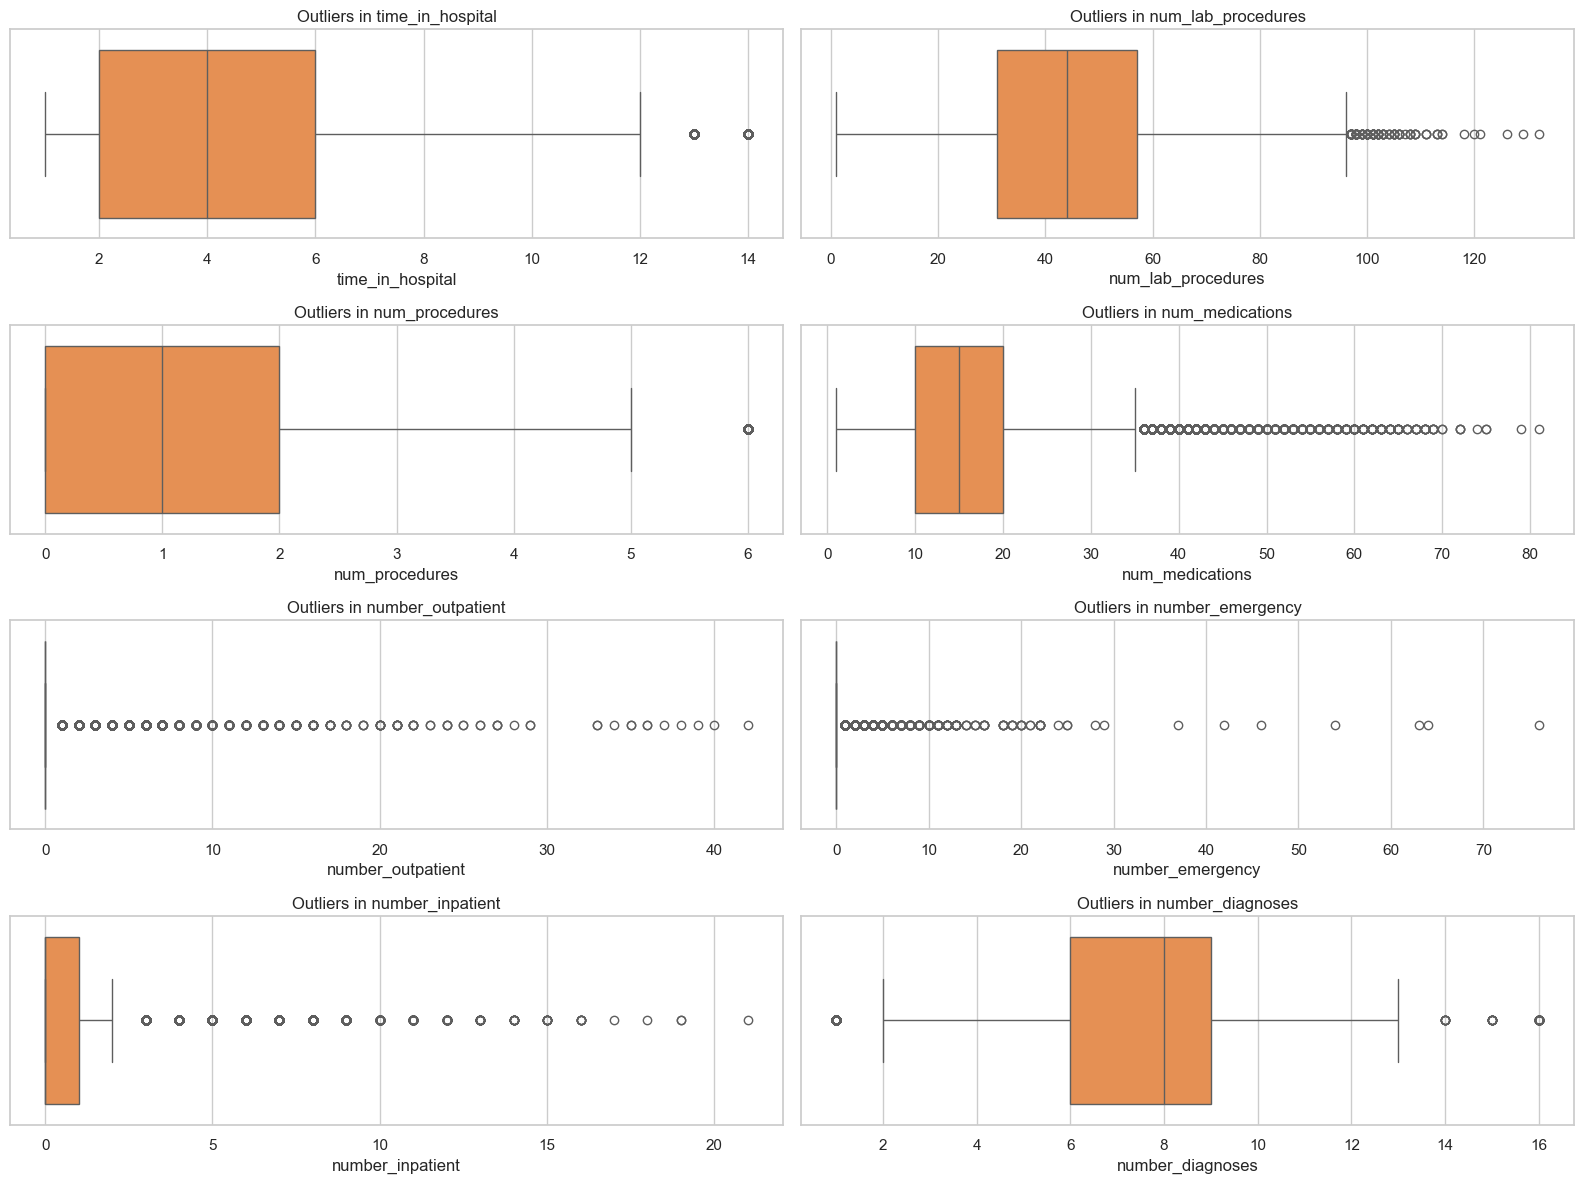

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
num_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses'
]

# 1. Calculate Outliers using IQR Method
outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_summary.append({
        'Column': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers),
        'Percentage': (len(outliers) / len(df)) * 100
    })

# Display summary as a DataFrame
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

# 2. Visualize Outliers with Boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col], palette="Oranges")
    plt.title(f'Outliers in {col}')
    plt.tight_layout()

plt.show()

In [ ]:
df.shape

(101766, 40)

In [ ]:
# # List of numerical columns to check for outliers
# num_cols = [
#     'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
#     'num_medications', 'number_outpatient', 'number_emergency', 
#     'number_inpatient', 'number_diagnoses'
# ]

# def remove_outliers_iqr(df, columns):
#     df_final = df.copy()
#     initial_shape = df_final.shape[0]
    
#     for col in columns:
#         # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#         Q1 = df_final[col].quantile(0.25)
#         Q3 = df_final[col].quantile(0.75)
#         IQR = Q3 - Q1
        
#         # Define bounds
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
        
#         # Filter the DataFrame
#         df_final = df_final[(df_final[col] >= lower_bound) & (df_final[col] <= upper_bound)]
    
#     final_shape = df_final.shape[0]
#     print(f"Rows before removal: {initial_shape}")
#     print(f"Rows after removal: {final_shape}")
#     print(f"Total rows removed: {initial_shape - final_shape}")
    
#     return df_final

# # Execute the removal
# df_cleaned = remove_outliers_iqr(df, num_cols)

--result after remove outliers
Rows before removal: 101766
Rows after removal: 66592
Total rows removed: 35174

In [ ]:
import numpy as np

# 1. Ensure '?' are treated as NaN (if not done already)
# df.replace('?', np.nan, inplace=True)

# 2. List of columns to fill
diag_cols = ['diag_1', 'diag_2', 'diag_3', 'race']

# 3. Fill missing values with the Mode (most frequent value)
for col in diag_cols:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent)

# 4. Verify that there are no more nulls in these columns
print(df[diag_cols].isnull().sum())

diag_1    0
diag_2    0
diag_3    0
race      0
dtype: int64


In [ ]:
df.isnull().sum()

race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-

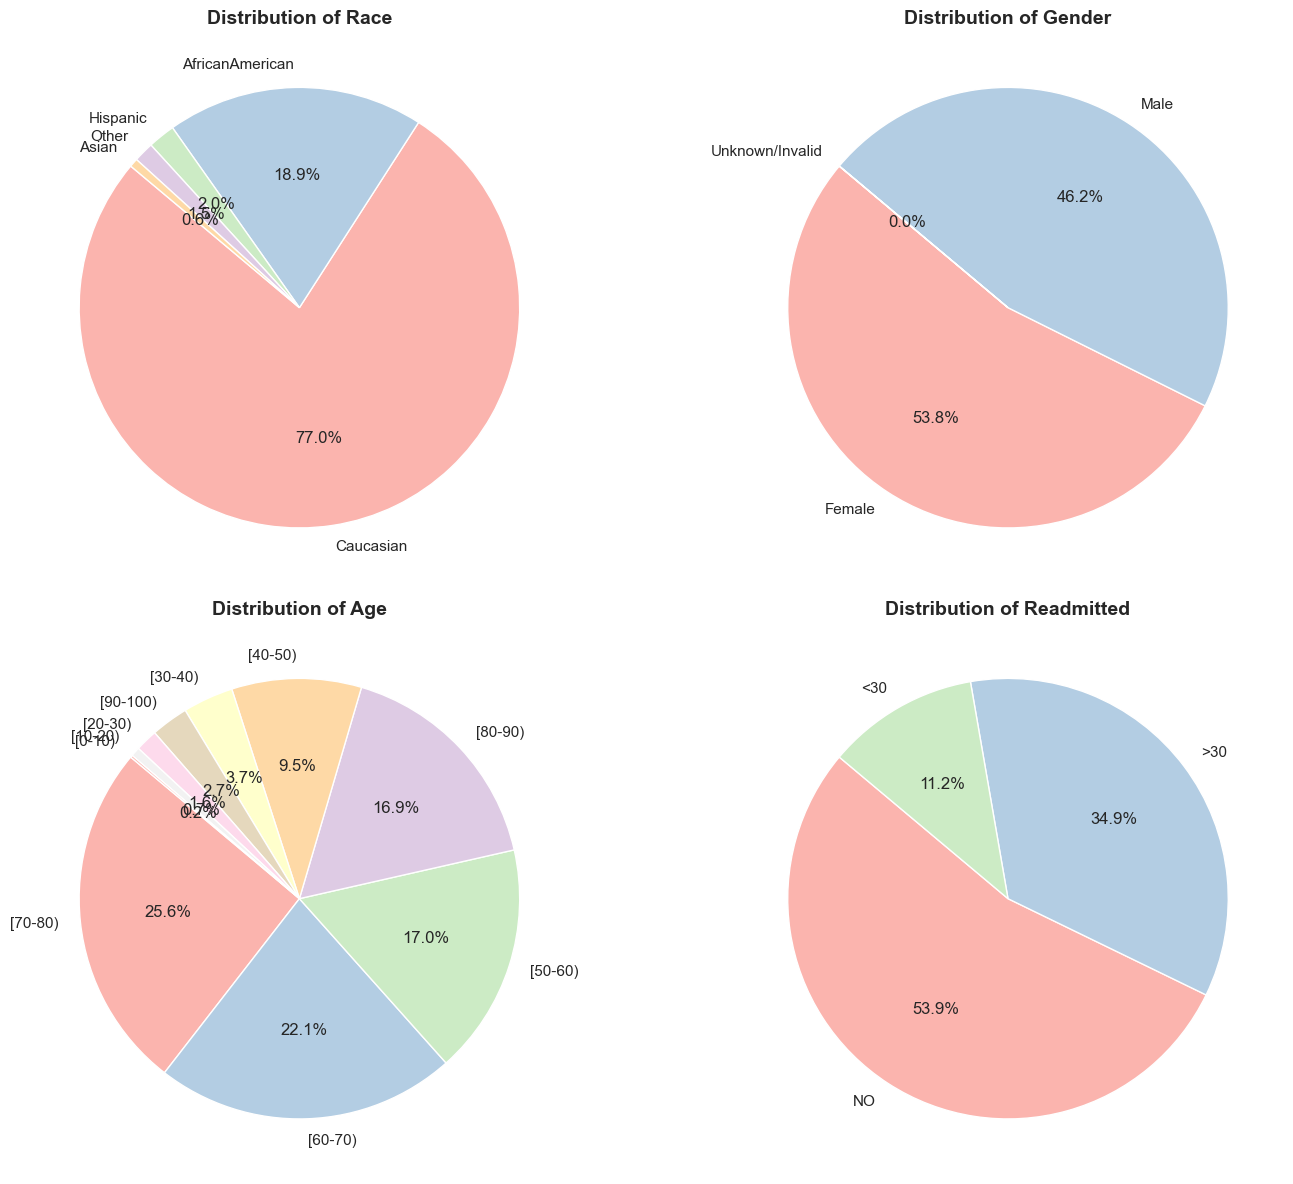

In [ ]:
import matplotlib.pyplot as plt

# 1. Select the categorical columns you want to visualize
# We pick the most important ones for clarity
cat_cols_for_pie = ['race', 'gender', 'age', 'readmitted']

# 2. Set up the figure layout
plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_cols_for_pie, 1):
    plt.subplot(2, 2, i)
    
    # Get the counts for each category
    data_counts = df[col].value_counts()
    
    # Create the pie chart
    plt.pie(
        data_counts, 
        labels=data_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Pastel1.colors,
        wedgeprops={'edgecolor': 'white'}
    )
    
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Bivariate Analysis

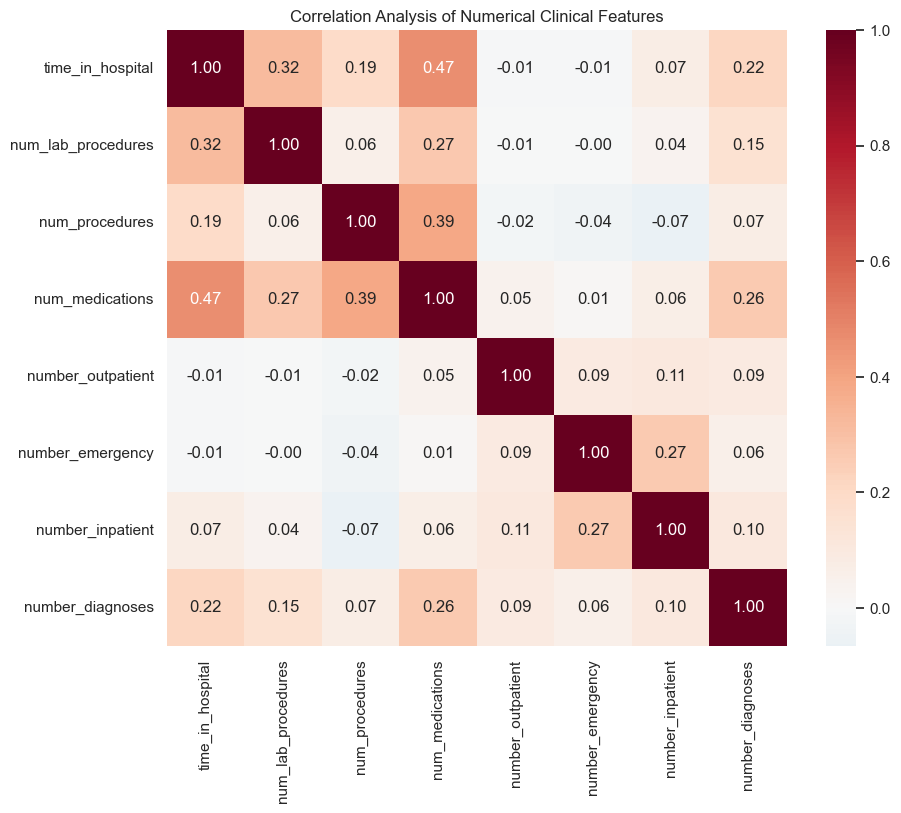

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()

# Plot Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title('Correlation Analysis of Numerical Clinical Features')
plt.show()

Average Clinical Values by Readmission Status:
            num_medications  time_in_hospital  num_lab_procedures
readmitted                                                       
<30               16.903143          4.768249           44.226028
>30               16.282768          4.495541           43.836601
NO                15.670367          4.254429           42.381598


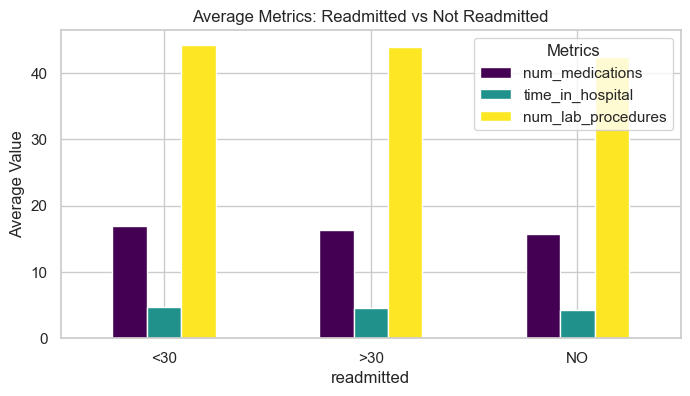

In [ ]:
# Grouping by 'readmitted' status to compare means of key metrics
comparison_metrics = ['num_medications', 'time_in_hospital', 'num_lab_procedures']
group_comparison = df.groupby('readmitted')[comparison_metrics].mean()

print("Average Clinical Values by Readmission Status:")
print(group_comparison)

# Visualize the comparison
group_comparison.plot(kind='bar', figsize=(8, 4), colormap='viridis')
plt.title('Average Metrics: Readmitted vs Not Readmitted')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(title='Metrics')
plt.show()

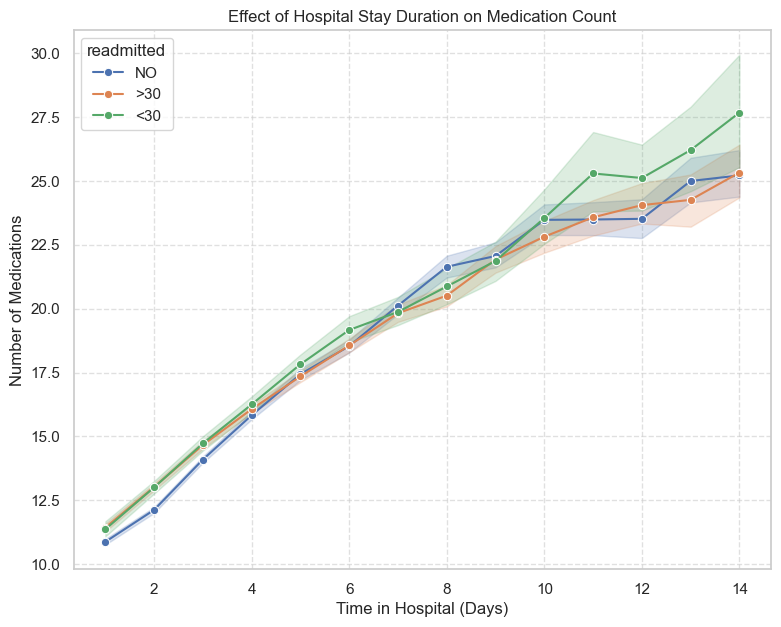

In [ ]:
import seaborn as sns

# Visualizing the relationship between Time in Hospital and Number of Medications
plt.figure(figsize=(9, 7))

# Pointplot/Lineplot helps see the trend and the confidence interval (effect)
sns.lineplot(data=df, x='time_in_hospital', y='num_medications', hue='readmitted', marker='o')

plt.title('Effect of Hospital Stay Duration on Medication Count')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Number of Medications')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<Figure size 1200x700 with 0 Axes>

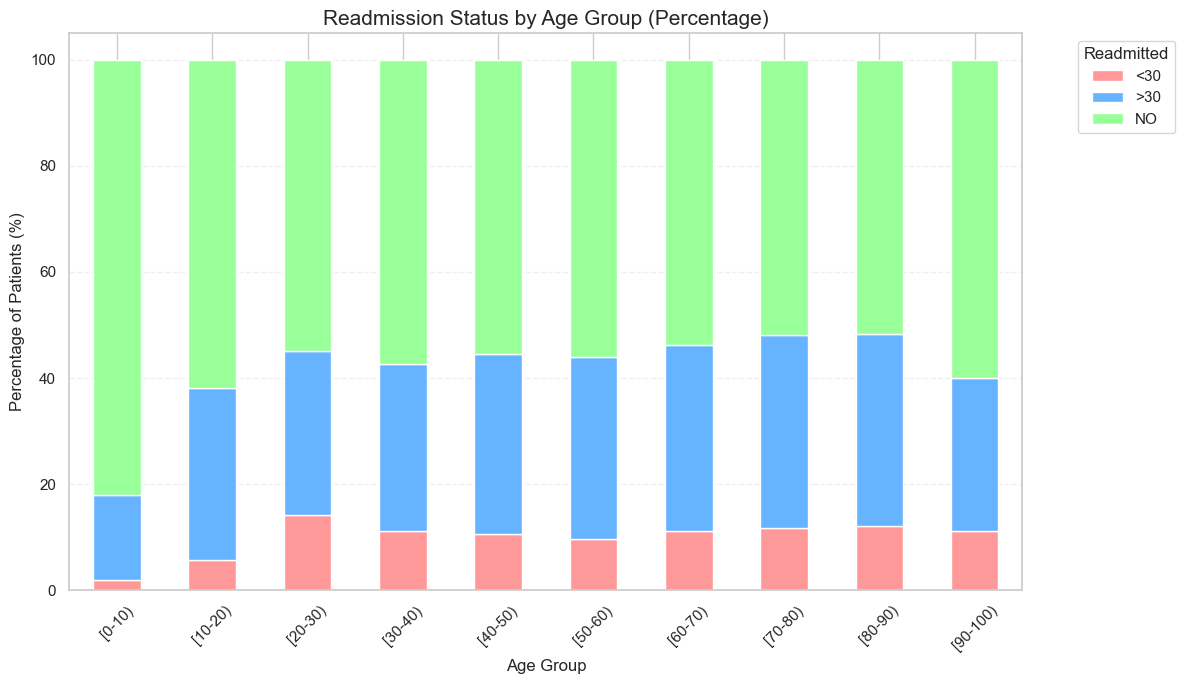

readmitted        <30        >30         NO
age                                        
[0-10)       1.863354  16.149068  81.987578
[10-20)      5.788712  32.416787  61.794501
[20-30)     14.242607  30.778515  54.978877
[30-40)     11.231788  31.443709  57.324503
[40-50)     10.604027  33.846154  55.549819
[50-60)      9.666203  34.289522  56.044274
[60-70)     11.128408  35.124316  53.747276
[70-80)     11.773055  36.347246  51.879699
[80-90)     12.083503  36.186544  51.729953
[90-100)    11.099177  28.929467  59.971357


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare data (normalize to show percentages within each age group)
age_readmit_ct = pd.crosstab(df['age'], df['readmitted'], normalize='index') * 100

# 2. Ensure age groups are in the correct chronological order
age_order = sorted(df['age'].unique())
age_readmit_ct = age_readmit_ct.reindex(age_order)

# 3. Visualization
plt.figure(figsize=(12, 7))
age_readmit_ct.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff','#99ff99'], figsize=(12, 7))

plt.title('Readmission Status by Age Group (Percentage)', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage of Patients (%)', fontsize=12)
plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the percentage table
print(age_readmit_ct)

To analyze the relationship between Age and Readmission, we use a stacked bar chart showing the percentage of each readmission status ($<30$, $>30$, or $NO$) for every age bracket.

In [ ]:
df.shape


(101766, 40)

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
features = ['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'
]
target = 'readmitted'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [ ]:
df = df[features + [target]]

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head(5)

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,1,41,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,2
1,2,0,1,3,59,0,18,0,0,0,...,0,3,1,0,0,0,0,0,1,1
2,0,0,2,2,11,5,13,2,0,1,...,0,1,1,0,0,0,0,1,1,2
3,2,1,3,2,44,1,16,0,0,0,...,0,3,1,0,0,0,0,0,1,2
4,2,1,4,1,51,0,8,0,0,0,...,0,2,1,0,0,0,0,0,1,2


In [ ]:
X = df[features]
y = df[target]

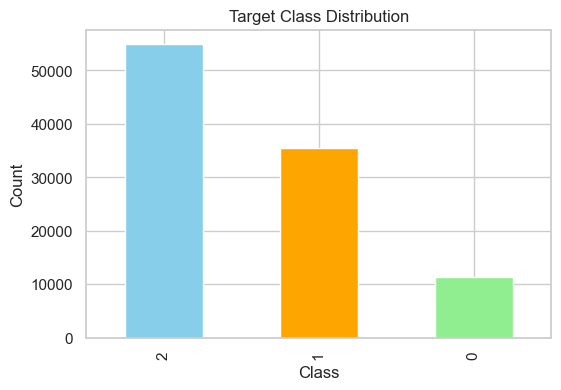

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution
plt.figure(figsize=(6,4))
df['readmitted'].value_counts().plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'])
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:23:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.581

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.02      0.03      2285
           1       0.50      0.35      0.41      7117
           2       0.61      0.85      0.71     10952

    accuracy                           0.58     20354
   macro avg       0.52      0.41      0.39     20354
weighted avg       0.55      0.58      0.53     20354


Confusion Matrix:
 [[  41  867 1377]
 [  36 2501 4580]
 [  16 1646 9290]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23116\3571300482.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(39), palette='magma')


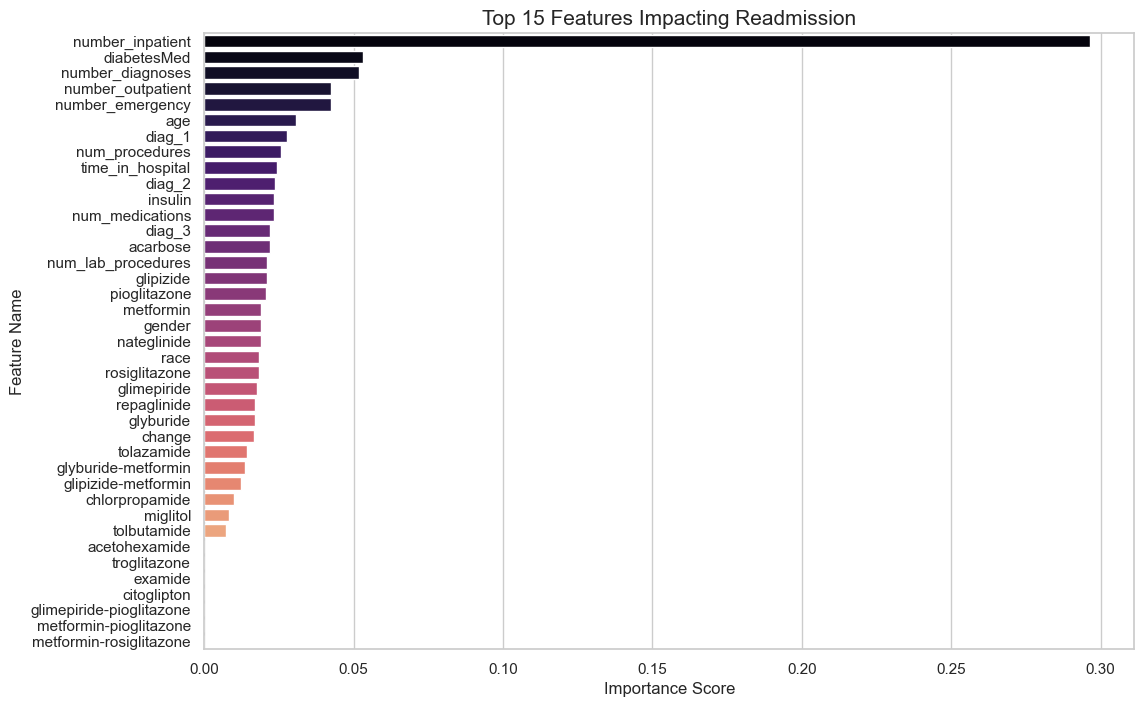

              Feature  Importance
9    number_inpatient    0.296449
38        diabetesMed    0.053112
13   number_diagnoses    0.051637
7   number_outpatient    0.042557
8    number_emergency    0.042459
2                 age    0.030866
10             diag_1    0.027839
5      num_procedures    0.025525
3    time_in_hospital    0.024330
11             diag_2    0.023670


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get feature importance from the model
importances = model.feature_importances_

# 2. Match importances with the column names (X_train.columns)
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 3. Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Plot the top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(39), palette='magma')

plt.title('Top 15 Features Impacting Readmission', fontsize=15)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

# Optional: Print the exact scores
print(feature_importance_df.head(10))